In [6]:
__version__ = '0.3'
__author__  = "Robert Matern (r.matern@stud.uni-hannover.de)"
__date__    = ''
__url__     = ''
__copyright__ = "(C) 2015 Robert Matern"

#Beispieldaten Nr. 2

In [7]:
%run Parameter.ipynb
%run DynamicProgramm.ipynb

Python Version 2.7.9 |Anaconda 2.2.0 (x86_64)| (default, Dec 15 2014, 10:37:34) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy Version 1.9.2
Matplotlib Version 1.4.3
Pandas Version 0.15.2


In [8]:
# Produkte
products = Product(2)

# Ressourcen
resources = Resource(4)

#Kapazität
capacities = Capacity(resources)
capacities[1] = 2
capacities[2] = 1
capacities[3] = 3
capacities[4] = 4
#capacities[5] = 5
#capacities[6] = 6
#capacities[7] = 7
#capacities[8] = 8
#capacities[9] = 9
#capacities[10] = 10

# Ressourcenverbrauch
consumtions = Consumption(products, resources)
consumtions[1] = [0,1,0,1,0]#,1,1,0,1,1,1]
consumtions[2] = [0,0,1,0,1]#,1,0,0,1,1,0]

# Erträge
revenues = Revenue(products)
revenues[1] = 100
revenues[2] = 200

# Buchungshorizont
times = Time(4)

# Wahrscheinlichkeiten
probs = Prob(products, times)
probs[1] = [0, 0.5, 0.5, 0.5, 0.5]
probs[2] = [0, 0.1, 0.1, 0.1, 0.1]

# Gegenwahrscheinlichkeiten
against_probs = Against_Prob(probs)
probs[0] = against_probs

# Tat. Nachfrage
demands = Demand(products, times)
demands[0] = [0, 1, 1, 1, 1] # Keine Anfragen müssen immer möglich sein!
demands[1] = [0, 1, 0, 0, 0]
demands[2] = [0, 1, 1, 1, 1]

# Systemzustände
conditions = Condition(capacities, resources, times)


# Endzeitpunkte
#end_times = End_Time(conditions)

0:00:00.000674


In [9]:
%time
print DP(solutions, conditions, products, resources, capacities, consumtions, times)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
231.25


Optimalen Politik zum Zeitpunkt "t" und unter Beachtung der Restkapazitäten "c[h]": 

           Successor  Res_Cap1  Res_Cap2  Res_Cap3  Res_Cap4  Time  \
4      [108, 3, 228]         2         1         3         4     4   
108       [107, 332]         2         0         3         3     3   
228  [452, 227, 332]         1         1         2         4     3   
452       [451, 556]         0         1         1         4     2   
332       [331, 556]         1         0         2         3     2   
556            [555]         0         0         1         3     1   
3      [107, 2, 227]         2         1         3         4     3   
107       [106, 331]         2         0         3         3     2   
227  [331, 226, 451]         1         1         2         4     2   
331       [330, 555]         1         0         2         3     1   
451       [450, 555]         0         1         1         4     1   
555            [end]         0         0         1         3     0   
2   

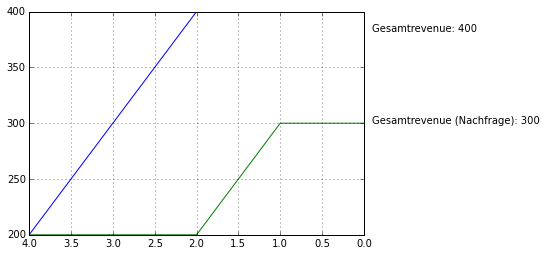

In [10]:
# Erstellung der Struktur als NetworkX-Graph
graph = Structure(solutions, products, consumtions, revenues, probs)

# Ermittlung der besten Politik (Dijkstra Algorithmus)
Best_Politic(graph, times, resources)
Best_Politic_Demand(graph, times, resources, demands)

%time

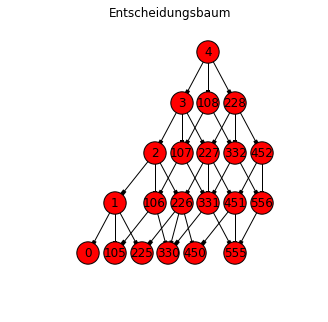

In [11]:
Drawing(graph)